# Binary classification for supersymmetry identification

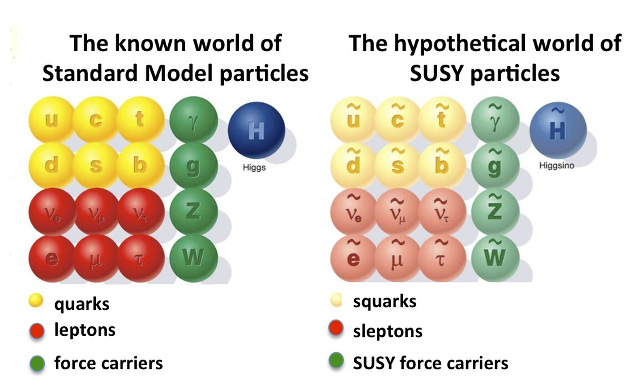

Supersymmetry (SUSY) is an idea in high-energy physics (HEP) that proposes a powerful symmetry between the two fundamental classes of particles: bosons, which have an integer spin, and fermions, which have a half-integer spin. According to supersymmetry, for every type of boson there exists a corresponding type of fermion, and vice versa. These corresponding particles are referred to as supersymmetric particles, or sparticles. For example, the supersymmetric partner of a quark (a fermion) would be a squark (a boson), and the partner of a photon (a boson) would be a photino (a fermion). Despite great effort and ingenuity over decades, supersymmetric particles have been detected. Its discovery would help resolve many issues in particle physics, including providing a candidate for dark matter. The continued lack of experimental proof of supersymmetry has causes a crisis in fundamental physics that is ongoing today.

In this notebook we train binary classification machine learning models in Python on a simulated particle physics dataset that exhibits the long sought supersymmetry.

### Library import

In [44]:
%matplotlib inline

# numerica and data wrangling
import numpy as np
import pandas as pd

# viz
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning data prep
from sklearn.model_selection import train_test_split

# machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn import tree
import xgboost as xgb

# machine learning evaluation
from sklearn.metrics import accuracy_score

### Data ingest

Get dataset from: https://www.kaggle.com/datasets/supersymmetry-dataset

In [3]:
df = pd.read_csv('./data/supersymmetry_dataset.csv')

In [4]:
print(df.shape)
print(df.columns)
display(df.head(4))
display(df.tail(4))

(5000000, 19)
Index(['SUSY', 'lepton 1 pT', 'lepton 1 eta', 'lepton 1 phi', 'lepton 2 pT',
       'lepton 2 eta', 'lepton 2 phi', 'missing energy magnitude',
       'missing energy phi', 'MET_rel', 'axial MET', 'M_R', 'M_TR_2', 'R',
       'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos(theta_r1)'],
      dtype='object')


,SUSY,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
0,0.0,0.707258,0.613159,-0.763354,1.010814,1.672101,1.544314,0.342641,0.286944,0.514347,-0.008000,0.832800,0.646217,0.688581,1.159059,0.807485,0.890080,0.272718,0.014631
1,0.0,0.493745,-1.745581,-0.640968,0.576161,-0.514477,-0.629788,0.585841,0.874038,0.879419,-0.221701,0.553944,0.770422,1.234180,1.671171,0.511589,1.255531,0.521592,0.158222
2,1.0,1.305413,0.283820,-1.149154,0.507217,-0.194161,1.313993,0.659832,0.619593,0.534922,-0.320298,0.861971,1.085602,1.117620,1.199941,0.754778,0.984459,0.235892,0.601631
3,1.0,0.809715,-0.358303,-0.497172,0.787675,0.027419,1.201305,0.790556,-0.861923,0.740287,0.890525,0.684771,0.717640,0.929989,0.341225,0.683829,0.492741,1.283829,0.115851


,SUSY,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
4999996,1.0,1.703428,-0.642585,1.197606,0.656566,1.518905,-0.168589,1.111145,0.496978,1.550931,0.813373,1.820490,1.014322,0.494429,0.000000,1.709095,1.067639,0.724796,0.109009
4999997,1.0,3.787456,-0.456186,-0.536557,1.556609,1.263663,1.132305,3.464473,1.236886,0.922248,-3.164055,3.452112,4.078378,1.048381,0.670448,3.584134,4.127820,1.557259,0.373298
4999998,1.0,1.584892,-0.644660,-0.287854,2.301142,-0.440804,1.359573,0.240126,-1.668636,0.254883,0.076701,1.554480,0.704920,0.402412,0.472014,1.558838,0.357319,0.295405,0.070806
4999999,0.0,0.599682,1.877611,-1.717350,0.997774,1.702977,0.052782,0.188564,0.849925,0.280356,0.498125,0.625976,0.371417,0.526526,0.000000,0.629604,0.149089,1.537262,0.012211


In [5]:
df['SUSY'].value_counts()

0.0    2712173
1.0    2287827
Name: SUSY, dtype: int64

In [6]:
print(2712173 / (2712173 + 2287827))

print(2287827 / (2712173 + 2287827))

0.5424346
0.4575654


### Prep data for machine learning

In [7]:
df.columns

Index(['SUSY', 'lepton 1 pT', 'lepton 1 eta', 'lepton 1 phi', 'lepton 2 pT',
       'lepton 2 eta', 'lepton 2 phi', 'missing energy magnitude',
       'missing energy phi', 'MET_rel', 'axial MET', 'M_R', 'M_TR_2', 'R',
       'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos(theta_r1)'],
      dtype='object')

In [8]:
df_X = df[['lepton 1 pT', 'lepton 1 eta', 'lepton 1 phi', 'lepton 2 pT',
       'lepton 2 eta', 'lepton 2 phi', 'missing energy magnitude',
       'missing energy phi', 'MET_rel', 'axial MET', 'M_R', 'M_TR_2', 'R',
       'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos(theta_r1)']]

df_y = df[['SUSY']]

# decrease dataset size to decrease model training time. 
# comment out the next 2 lines if you want to train on the full dataset
df_X = df_X.head(50000)
df_y = df_y.head(50000)

X = df_X.values
y = df_y.values

# check class balance after the data size reduction
df_y['SUSY'].value_counts()

0.0    27262
1.0    22738
Name: SUSY, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)#, random_state=0)

print(X_train.shape, y_train.shape, X_test.shape, y_train.shape)

(35000, 18) (35000, 1) (15000, 18) (35000, 1)


### Train and evaluate machine learning models

#### Logistic regression

LR with default hyperparameters

In [22]:
clf_lr = LogisticRegression()
clf_lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [4]:
%%time
clf_lr.fit(X_train, y_train)

Wall time: 246 ms

In [24]:
y_pred_lr = clf_lr.predict(X_test)

In [29]:
score_accuracy_lr = accuracy_score(y_test, y_pred_lr)
#print(score_accuracy_lr)
print( f'LR accuracy score is: {round(score_accuracy_lr,2)}')

LR accuracy score is: 0.79


### Decision tree

In [33]:
clf_tree = tree.DecisionTreeClassifier()
clf_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [38]:
%%time
clf_tree.fit(X_train, y_train)

Wall time: 871 ms


DecisionTreeClassifier()

In [36]:
y_pred_tree = clf_tree.predict(X_test)

In [37]:
score_accuracy_tree = accuracy_score(y_test, y_pred_tree)
#print(score_accuracy_xgb)
print( f'Decision tree accuracy score is: {round(score_accuracy_tree,2)}')

Decision tree accuracy score is: 0.71


#### XGBoost 

XGBoost classification with default hyperparameters

In [20]:
clf_xgb = xgb.sklearn.XGBClassifier()

clf_xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [21]:
%%time 

clf_xgb.fit(X_train, y_train)
#clf_xgb_score = clf_xgb.score(X_test, y_test)
#print(clf_xgb_score)

Wall time: 2.39 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [14]:
y_pred_xgb = clf_xgb.predict(X_test)

In [28]:
score_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
#print(score_accuracy_xgb)
print( f'XGBoost accuracy score is: {round(score_accuracy_xgb,2)}')

XGBoost accuracy score is: 0.79


### Compare model performance

In [47]:
df_perf = pd.DataFrame({'Model': ['Decision Tree', 'XGBoost'],
                        'Test Accuracy': [score_accuracy_tree, score_accuracy_xgb]
                       })

In [49]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.2f}'.format(p.get_height()) # '{:.1f}' #2f # {:.2f}
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5) # 0.5
                #_y = p.get_y() + p.get_height() - (p.get_height()*0.75)
                value = '{:.3f}'.format(p.get_width())  # '{:.1f}' # 2f # '{:.3f}'
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

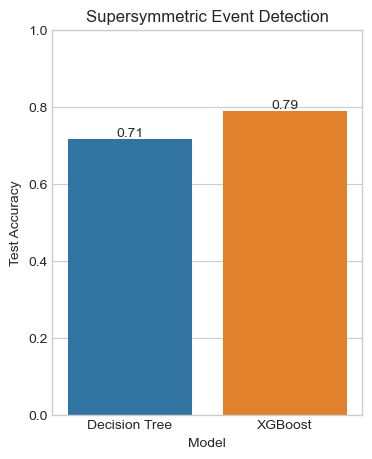

In [57]:
plt.figure(figsize=(4,5))

plt.style.use('default')
plt.style.use('seaborn-whitegrid')
#plt.style.use('seaborn-poster')

p = sns.barplot(y='Test Accuracy', x = 'Model', data = df_perf) # palette="Blues_r"

plt.ylim(0,1)
plt.title('Supersymmetric Event Detection')

#show_values(p, "h", space=0)
show_values(p, "v", space=0.2)

### Conclusion

We are able to classify the events in the reduced dataset, achieving 0.71 accuracy score for the decision tree and a 0.79 accuracy score for the XGBoost ensemble model. Much work remains in exploring this dataset, engineering features, testing and tuning models. 